# Assignment03 Gradient Descent and Dymanic Programming

In this week, we need complete following tasks:
+ Re-review the course online programming; 
+ Choose 1 - 2 books which you interested and keep reading; 
+ Answer the review questions
+ Prepare the basic requirement of our 1st project. 

# Part1  Online programming review: 动态规划复现（钢管切割问题）

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i+1] = original_price[i]

## 1.1穷举法：利用python的装饰器写出每个价格的计算次数

In [92]:
from functools import wraps
# count_times = defaultdict(int)
def get_call_times(f):
    get_call_times.count = defaultdict(int)
    @wraps(f)
    def wrap(n):
#         count_times[(f.__name__, n)] += 1
        get_call_times.count[(f.__name__, n)] += 1
        return f(n)
    return wrap
        

In [93]:
@get_call_times
def r(n): return max([price[n]]+[r(i)+r(n-i) for i in range(1, int(n/2)+1)])

In [96]:
# count_times = defaultdict(int)
r(10)

30

In [97]:
get_call_times.count

defaultdict(int,
            {('r', 10): 2,
             ('r', 1): 1004,
             ('r', 9): 2,
             ('r', 8): 4,
             ('r', 7): 8,
             ('r', 6): 16,
             ('r', 5): 34,
             ('r', 4): 70,
             ('r', 3): 152,
             ('r', 2): 358})

## 1.2 查表法

In [189]:
count_times = defaultdict(int)
solution = {}
def memo(f):
    memo.already_computed = defaultdict(int)
    @wraps(f)
    def wrap(n):
        if n in memo.already_computed:
            result = memo.already_computed[n]
        else: 
            result = f(n)
            memo.already_computed[n] = result
            count_times[(f.__name__),n] += 1
        return result
    print(memo.already_computed)
    return wrap
        

In [190]:
@memo
def r_(n): 
    max_price, max_split = max([(price[n], 0)]+[(r_(i)+r_(n-i), i) for i in range(1, int(n/2)+1)], key=lambda x:x[0])
    solution[n] = (n-max_split, max_split)
    return max_price 

defaultdict(<class 'int'>, {})


In [191]:
count_times = defaultdict(int)
r_(30)

92

In [192]:
count_times

defaultdict(int,
            {('r_', 1): 1,
             ('r_', 2): 1,
             ('r_', 3): 1,
             ('r_', 4): 1,
             ('r_', 5): 1,
             ('r_', 6): 1,
             ('r_', 7): 1,
             ('r_', 8): 1,
             ('r_', 9): 1,
             ('r_', 10): 1,
             ('r_', 11): 1,
             ('r_', 12): 1,
             ('r_', 13): 1,
             ('r_', 14): 1,
             ('r_', 15): 1,
             ('r_', 16): 1,
             ('r_', 17): 1,
             ('r_', 18): 1,
             ('r_', 19): 1,
             ('r_', 20): 1,
             ('r_', 21): 1,
             ('r_', 22): 1,
             ('r_', 23): 1,
             ('r_', 24): 1,
             ('r_', 25): 1,
             ('r_', 26): 1,
             ('r_', 27): 1,
             ('r_', 28): 1,
             ('r_', 29): 1,
             ('r_', 30): 1})

In [193]:
solution

{1: (1, 0),
 2: (2, 0),
 3: (3, 0),
 4: (2, 2),
 5: (3, 2),
 6: (6, 0),
 7: (6, 1),
 8: (6, 2),
 9: (6, 3),
 10: (10, 0),
 11: (11, 0),
 12: (11, 1),
 13: (11, 2),
 14: (11, 3),
 15: (13, 2),
 16: (14, 2),
 17: (11, 6),
 18: (17, 1),
 19: (17, 2),
 20: (17, 3),
 21: (11, 10),
 22: (11, 11),
 23: (22, 1),
 24: (22, 2),
 25: (22, 3),
 26: (24, 2),
 27: (25, 2),
 28: (22, 6),
 29: (28, 1),
 30: (28, 2)}

## 1.3 解析切割方法

In [197]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0: return [left_split]
    return parse_solution(left_split) +parse_solution(right_split)

In [201]:
r_(234),parse_solution(234)

(743,
 [11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  11,
  3])

# Part2  将损失函数由 $loss = \frac{1}{n}\sum{(y_i - \hat(y_i))^2}$ 变为 $loss = \frac{1}{n}\sum{|y_i - \hat{y_i}|}$, 实现梯度下降代码。

+ loss函数的形式是$loss = \frac{1}{n}\sum{|y_i-\hat y_i|}$

In [2]:
from sklearn.datasets import load_boston

In [4]:
data = load_boston()
x, y = data['data'],data['target']
rm = x[:,5]
rm

array([6.575, 6.421, 7.185, 6.998, 7.147, 6.43 , 6.012, 6.172, 5.631,
       6.004, 6.377, 6.009, 5.889, 5.949, 6.096, 5.834, 5.935, 5.99 ,
       5.456, 5.727, 5.57 , 5.965, 6.142, 5.813, 5.924, 5.599, 5.813,
       6.047, 6.495, 6.674, 5.713, 6.072, 5.95 , 5.701, 6.096, 5.933,
       5.841, 5.85 , 5.966, 6.595, 7.024, 6.77 , 6.169, 6.211, 6.069,
       5.682, 5.786, 6.03 , 5.399, 5.602, 5.963, 6.115, 6.511, 5.998,
       5.888, 7.249, 6.383, 6.816, 6.145, 5.927, 5.741, 5.966, 6.456,
       6.762, 7.104, 6.29 , 5.787, 5.878, 5.594, 5.885, 6.417, 5.961,
       6.065, 6.245, 6.273, 6.286, 6.279, 6.14 , 6.232, 5.874, 6.727,
       6.619, 6.302, 6.167, 6.389, 6.63 , 6.015, 6.121, 7.007, 7.079,
       6.417, 6.405, 6.442, 6.211, 6.249, 6.625, 6.163, 8.069, 7.82 ,
       7.416, 6.727, 6.781, 6.405, 6.137, 6.167, 5.851, 5.836, 6.127,
       6.474, 6.229, 6.195, 6.715, 5.913, 6.092, 6.254, 5.928, 6.176,
       6.021, 5.872, 5.731, 5.87 , 6.004, 5.961, 5.856, 5.879, 5.986,
       5.613, 5.693,

In [5]:
def loss_abs(y, y_hat):
    n = len(y)
    sum_loss = 0
    for yi,yi_hat in zip(list(y),list(y_hat)):
        sum_loss += abs(yi-yi_hat)
        return sum_loss/n

In [8]:
def gradient_k(x,y,y_hat):
    n = len(x)
    sum_gradient = 0
    for xi, yi, yi_hat in zip(x,y,y_hat):
        sum_gradient += (yi-yi_hat)*xi
    return (-2/n)*sum_gradient

In [9]:
def gradient_b(x,y,y_hat):
    n = len(x)
    sum_gradient = 0
    for yi, yi_hat in zip(y,y_hat):
        sum_gradient += (yi-yi_hat)
    return (-2/n)*sum_gradient
    

In [17]:
import random
trying_times = 10000
min_loss = float('inf')

learning_rate = 0.01
k = random.random()*200-100
b = random.random()*200-100
for i in range(trying_times):
    y_hat = rm*k + b    
    current_loss = loss_abs(y,y_hat)
    if current_loss < min_loss:
        min_loss = current_loss
        print('When the time is {}'.format(i),'the current loss is ', min_loss, ', the best k, b is', k, b)  
    
    # 无论loss是否减小，都按照梯度反方向迭代更改参数
    
    gk = gradient_k(rm,y,y_hat)
    gb = gradient_b(rm,y,y_hat)
    k = k - gk*learning_rate
    b = b - gb*learning_rate

When the time is 0 the current loss is  0.7964169276469699 , the best k, b is 75.72521240856156 -70.90630619692547
When the time is 1 the current loss is  0.14810253205225052 , the best k, b is 26.995514926660192 -78.55562942435202
When the time is 2 the current loss is  0.031111022128000414 , the best k, b is 18.200635244775377 -79.9269995376299
When the time is 3 the current loss is  0.009998841884212219 , the best k, b is 16.612152726452578 -80.16549018301433
When the time is 4 the current loss is  0.006188468452009347 , the best k, b is 16.32409359924572 -80.19955037832389
When the time is 5 the current loss is  0.00550027506855414 , the best k, b is 16.270701388363037 -80.19672244379858
When the time is 6 the current loss is  0.005375491645470063 , the best k, b is 16.25965609582981 -80.18724005747316
When the time is 7 the current loss is  0.005352377935635124 , the best k, b is 16.25625281244109 -80.1765590063688
When the time is 8 the current loss is  0.005347611073562772 , the

When the time is 267 the current loss is  0.005164157404674361 , the best k, b is 15.82225343930561 -77.41825271666916
When the time is 268 the current loss is  0.005163474331389553 , the best k, b is 15.820637430956316 -77.40797309685466
When the time is 269 the current loss is  0.005162791422364898 , the best k, b is 15.819021811212204 -77.3976959490036
When the time is 270 the current loss is  0.0051621086775609365 , the best k, b is 15.817406579979831 -77.38742127252156
When the time is 271 the current loss is  0.005161426096938153 , the best k, b is 15.81579173716577 -77.37714906681423
When the time is 272 the current loss is  0.005160743680457089 , the best k, b is 15.814177282676614 -77.36687933128745
When the time is 273 the current loss is  0.005160061428078256 , the best k, b is 15.812563216418983 -77.35661206534722
When the time is 274 the current loss is  0.005159379339762196 , the best k, b is 15.81094953829952 -77.34634726839967
When the time is 275 the current loss is  0

When the time is 465 the current loss is  0.005032062714351779 , the best k, b is 15.509745063994702 -75.43035006230316
When the time is 466 the current loss is  0.005031411406176126 , the best k, b is 15.508204205241798 -75.4205484779397
When the time is 467 the current loss is  0.005030760254622039 , the best k, b is 15.506663717022686 -75.41074925058541
When the time is 468 the current loss is  0.005030109259651828 , the best k, b is 15.505123599248265 -75.40095237967351
When the time is 469 the current loss is  0.0050294584212278864 , the best k, b is 15.50358385182945 -75.39115786463734
When the time is 470 the current loss is  0.005028807739312497 , the best k, b is 15.502044474677183 -75.38136570491035
When the time is 471 the current loss is  0.005028157213868083 , the best k, b is 15.500505467702423 -75.37157589992619
When the time is 472 the current loss is  0.005027506844856982 , the best k, b is 15.498966830816155 -75.36178844911859
When the time is 473 the current loss is 

When the time is 715 the current loss is  0.004874015031101155 , the best k, b is 15.135837342240846 -73.05187891949637
When the time is 716 the current loss is  0.004873401729009658 , the best k, b is 15.134386397924153 -73.04264929147243
When the time is 717 the current loss is  0.0048727885744002915 , the best k, b is 15.132935802519327 -73.03342188291803
When the time is 718 the current loss is  0.004872175567237615 , the best k, b is 15.131485555942461 -73.02419669329946
When the time is 719 the current loss is  0.004871562707486156 , the best k, b is 15.130035658109673 -73.01497372208311
When the time is 720 the current loss is  0.004870949995110444 , the best k, b is 15.128586108937098 -73.00575296873554
When the time is 721 the current loss is  0.004870337430075121 , the best k, b is 15.127136908340896 -72.99653443272338
When the time is 722 the current loss is  0.004869725012344659 , the best k, b is 15.125688056237239 -72.98731811351345
When the time is 723 the current loss i

When the time is 965 the current loss is  0.004725189976665434 , the best k, b is 14.78374842894931 -70.81219979214902
When the time is 966 the current loss is  0.004724612462871633 , the best k, b is 14.782382152250573 -70.80350874483447
When the time is 967 the current loss is  0.004724035087953888 , the best k, b is 14.781016204103487 -70.79481978747576
When the time is 968 the current loss is  0.004723457851878833 , the best k, b is 14.779650584429044 -70.78613291957028
When the time is 969 the current loss is  0.004722880754613019 , the best k, b is 14.778285293148254 -70.77744814061559
When the time is 970 the current loss is  0.004722303796123084 , the best k, b is 14.776920330182149 -70.76876545010936
When the time is 971 the current loss is  0.00472172697637566 , the best k, b is 14.775555695451779 -70.76008484754936
When the time is 972 the current loss is  0.004721150295337412 , the best k, b is 14.774191388878211 -70.75140633243352
When the time is 973 the current loss is  

When the time is 1215 the current loss is  0.0045850493787632195 , the best k, b is 14.452205121201251 -68.70321368624404
When the time is 1216 the current loss is  0.004584505564896245 , the best k, b is 14.450918571472197 -68.6950297915922
When the time is 1217 the current loss is  0.004583961881801404 , the best k, b is 14.449632331122668 -68.68684786494003
When the time is 1218 the current loss is  0.004583418329447268 , the best k, b is 14.448346400078268 -68.6786679058143
When the time is 1219 the current loss is  0.004582874907802412 , the best k, b is 14.447060778264616 -68.67048991374183
When the time is 1220 the current loss is  0.004582331616835351 , the best k, b is 14.445775465607351 -68.66231388824964
When the time is 1221 the current loss is  0.004581788456514745 , the best k, b is 14.444490462032132 -68.65413982886481
When the time is 1222 the current loss is  0.004581245426809109 , the best k, b is 14.443205767464631 -68.64596773511454
When the time is 1223 the current

When the time is 1465 the current loss is  0.004453086469326751 , the best k, b is 14.140008511870619 -66.71729421206999
When the time is 1466 the current loss is  0.004452574388879316 , the best k, b is 14.138797036766887 -66.70958787596935
When the time is 1467 the current loss is  0.004452062431573009 , the best k, b is 14.137585852989313 -66.7018833930288
When the time is 1468 the current loss is  0.004451550597378201 , the best k, b is 14.136374960467844 -66.6941807628027
When the time is 1469 the current loss is  0.004451038886265375 , the best k, b is 14.135164359132443 -66.68647998484553
When the time is 1470 the current loss is  0.004450527298204874 , the best k, b is 14.133954048913084 -66.67878105871186
When the time is 1471 the current loss is  0.004450015833167068 , the best k, b is 14.132744029739762 -66.6710839839564
When the time is 1472 the current loss is  0.004449504491122468 , the best k, b is 14.13153430154249 -66.66338876013391
When the time is 1473 the current lo

When the time is 1715 the current loss is  0.004328824051957163 , the best k, b is 13.846029654207733 -64.84726000612552
When the time is 1716 the current loss is  0.004328341853174519 , the best k, b is 13.844888872865342 -64.84000336138332
When the time is 1717 the current loss is  0.004327859770347254 , the best k, b is 13.84374836584922 -64.83274846166292
When the time is 1718 the current loss is  0.004327377803447563 , the best k, b is 13.842608133093405 -64.82549530654467
When the time is 1719 the current loss is  0.00432689595244756 , the best k, b is 13.84146817453194 -64.81824389560904
When the time is 1720 the current loss is  0.004326414217319327 , the best k, b is 13.84032849009889 -64.81099422843663
When the time is 1721 the current loss is  0.004325932598035062 , the best k, b is 13.839189079728339 -64.80374630460808
When the time is 1722 the current loss is  0.004325451094566874 , the best k, b is 13.838049943354376 -64.79650012370419
When the time is 1723 the current lo

When the time is 1965 the current loss is  0.004211812776315664 , the best k, b is 13.569205479409458 -63.08634876230146
When the time is 1966 the current loss is  0.0042113587154993274 , the best k, b is 13.568131266602988 -63.079515567871994
When the time is 1967 the current loss is  0.004210904763871966 , the best k, b is 13.567057312114901 -63.07268401663626
When the time is 1968 the current loss is  0.004210450921407463 , the best k, b is 13.565983615883084 -63.06585410819911
When the time is 1969 the current loss is  0.004209997188079403 , the best k, b is 13.564910177845428 -63.05902584216551
When the time is 1970 the current loss is  0.004209543563861695 , the best k, b is 13.563836997939848 -63.052199218140494
When the time is 1971 the current loss is  0.004209090048727997 , the best k, b is 13.56276407610427 -63.04537423572921
When the time is 1972 the current loss is  0.0042086366426520765 , the best k, b is 13.561691412276632 -63.038550894536904
When the time is 1973 the cu

When the time is 2215 the current loss is  0.00410162951320936 , the best k, b is 13.308534952413202 -61.428192778432866
When the time is 2216 the current loss is  0.004101201948411704 , the best k, b is 13.307523423638402 -61.421758324526174
When the time is 2217 the current loss is  0.004100774486431506 , the best k, b is 13.306512138108216 -61.41532541792718
When the time is 2218 the current loss is  0.004100347127244051 , the best k, b is 13.30550109576415 -61.4088940582638
When the time is 2219 the current loss is  0.0040999198708246525 , the best k, b is 13.304490296547726 -61.40246424516403
When the time is 2220 the current loss is  0.004099492717148555 , the best k, b is 13.303479740400478 -61.39603597825598
When the time is 2221 the current loss is  0.004099065666191084 , the best k, b is 13.302469427263954 -61.38960925716782
When the time is 2222 the current loss is  0.004098638717927499 , the best k, b is 13.301459357079716 -61.38318408152782
When the time is 2223 the curren

When the time is 2465 the current loss is  0.00399787582449697 , the best k, b is 13.063075452013619 -59.86679592979408
When the time is 2466 the current loss is  0.003997473209583687 , the best k, b is 13.062122949440493 -59.8607369485219
When the time is 2467 the current loss is  0.003997070691488127 , the best k, b is 13.061170675917817 -59.854679424266656
When the time is 2468 the current loss is  0.003996668270186997 , the best k, b is 13.060218631390509 -59.84862335667798
When the time is 2469 the current loss is  0.0039962659456570125 , the best k, b is 13.059266815803504 -59.84256874540559
When the time is 2470 the current loss is  0.0039958637178749345 , the best k, b is 13.058315229101748 -59.83651559009928
When the time is 2471 the current loss is  0.003995461586817466 , the best k, b is 13.0573638712302 -59.83046389040893
When the time is 2472 the current loss is  0.003995059552461367 , the best k, b is 13.056412742133833 -59.8244136459845
When the time is 2473 the current 

When the time is 2714 the current loss is  0.0039005557344113533 , the best k, b is 12.832836498702981 -58.402218777359955
When the time is 2715 the current loss is  0.0039001765222804042 , the best k, b is 12.831939362212117 -58.39651198627078
When the time is 2716 the current loss is  0.003899797401339485 , the best k, b is 12.831042441457695 -58.39080656750657
When the time is 2717 the current loss is  0.003899418371566591 , the best k, b is 12.830145736387838 -58.385102520737334
When the time is 2718 the current loss is  0.0038990394329399 , the best k, b is 12.82924924695068 -58.37939984563313
When the time is 2719 the current loss is  0.0038986605854373943 , the best k, b is 12.828352973094363 -58.373698541864115
When the time is 2720 the current loss is  0.003898281829037224 , the best k, b is 12.827456914767051 -58.367998609100525
When the time is 2721 the current loss is  0.0038979031637174826 , the best k, b is 12.826561071916913 -58.36230004701267
When the time is 2722 the c

When the time is 2964 the current loss is  0.003808535395964674 , the best k, b is 12.615135647947328 -57.017397974895566
When the time is 2965 the current loss is  0.003808178312172819 , the best k, b is 12.614290862472824 -57.01202419479938
When the time is 2966 the current loss is  0.003807821314249703 , the best k, b is 12.613446280145796 -57.00665170694826
When the time is 2967 the current loss is  0.0038074644021746694 , the best k, b is 12.61260190091739 -57.00128051103145
When the time is 2968 the current loss is  0.0038071075759271177 , the best k, b is 12.61175772473877 -56.995910606738285
When the time is 2969 the current loss is  0.0038067508354863917 , the best k, b is 12.610913751561105 -56.99054199375816
When the time is 2970 the current loss is  0.003806394180831821 , the best k, b is 12.610069981335581 -56.98517467178055
When the time is 2971 the current loss is  0.0038060376119428063 , the best k, b is 12.609226414013394 -56.979808640495
When the time is 2972 the curr

When the time is 3214 the current loss is  0.0037218847624542143 , the best k, b is 12.410138394599182 -55.713386254687784
When the time is 3215 the current loss is  0.003721548515736339 , the best k, b is 12.409342905278214 -55.70832605324167
When the time is 3216 the current loss is  0.0037212123498764718 , the best k, b is 12.408547607250364 -55.70326706863365
When the time is 3217 the current loss is  0.003720876264855178 , the best k, b is 12.407752500469632 -55.69820930057111
When the time is 3218 the current loss is  0.003720540260652995 , the best k, b is 12.406957584890025 -55.6931527487615
When the time is 3219 the current loss is  0.0037202043372505157 , the best k, b is 12.406162860465567 -55.68809741291235
When the time is 3220 the current loss is  0.0037198684946282783 , the best k, b is 12.405368327150292 -55.683043292731256
When the time is 3221 the current loss is  0.00371953273276689 , the best k, b is 12.40457398489824 -55.67799038792588
When the time is 3222 the cur

When the time is 3464 the current loss is  0.003640290493029658 , the best k, b is 12.21710343982332 -54.48546812736533
When the time is 3465 the current loss is  0.003639973867470432 , the best k, b is 12.216354370054875 -54.48070320617076
When the time is 3466 the current loss is  0.0036396573180509017 , the best k, b is 12.215605480416931 -54.47593943080757
When the time is 3467 the current loss is  0.003639340844752713 , the best k, b is 12.214856770866174 -54.471176801000226
When the time is 3468 the current loss is  0.0036390244475575694 , the best k, b is 12.214108241359297 -54.46641531647325
When the time is 3469 the current loss is  0.0036387081264471315 , the best k, b is 12.213359891853003 -54.461654976951245
When the time is 3470 the current loss is  0.0036383918814032 , the best k, b is 12.212611722304011 -54.45689578215885
When the time is 3471 the current loss is  0.0036380757124074214 , the best k, b is 12.211863732669043 -54.452137731820805
When the time is 3472 the cu

When the time is 3714 the current loss is  0.0035634575313626283 , the best k, b is 12.035332742134832 -53.32920326866703
When the time is 3715 the current loss is  0.0035631593819996383 , the best k, b is 12.034627383177508 -53.3247163971003
When the time is 3716 the current loss is  0.0035628613043332605 , the best k, b is 12.033922193839448 -53.32023060450174
When the time is 3717 the current loss is  0.003562563298346336 , the best k, b is 12.033217174079866 -53.31574589061187
When the time is 3718 the current loss is  0.00356226536402155 , the best k, b is 12.03251232385798 -53.31126225517131
When the time is 3719 the current loss is  0.003561967501341729 , the best k, b is 12.031807643133021 -53.3067796979207
When the time is 3720 the current loss is  0.003561669710289615 , the best k, b is 12.031103131864233 -53.30229821860079
When the time is 3721 the current loss is  0.0035613719908479773 , the best k, b is 12.030398790010864 -53.29781781695235
When the time is 3722 the curren

When the time is 3964 the current loss is  0.0034911080386818994 , the best k, b is 11.864168993183116 -52.24041046260595
When the time is 3965 the current loss is  0.0034908272873651488 , the best k, b is 11.86350479435994 -52.236185415509844
When the time is 3966 the current loss is  0.0034905466035613183 , the best k, b is 11.86284075525816 -52.23196138442038
When the time is 3967 the current loss is  0.0034902659872541467 , the best k, b is 11.862176875839365 -52.22773836909323
When the time is 3968 the current loss is  0.003489985438427444 , the best k, b is 11.861513156065158 -52.223516369284134
When the time is 3969 the current loss is  0.0034897049570649197 , the best k, b is 11.860849595897147 -52.21929538474889
When the time is 3970 the current loss is  0.0034894245431504123 , the best k, b is 11.86018619529695 -52.21507541524335
When the time is 3971 the current loss is  0.003489144196667646 , the best k, b is 11.859522954226199 -52.21085646052343
When the time is 3972 the c

When the time is 4214 the current loss is  0.003422980389069085 , the best k, b is 11.702993240832681 -51.21515248160593
When the time is 4215 the current loss is  0.003422716020562475 , the best k, b is 11.702367800307506 -51.21117398061725
When the time is 4216 the current loss is  0.0034224517156291345 , the best k, b is 11.70174251018343 -51.2071964363477
When the time is 4217 the current loss is  0.003422187474253814 , the best k, b is 11.701117370424283 -51.20321984856723
When the time is 4218 the current loss is  0.0034219232964212204 , the best k, b is 11.70049238099391 -51.19924421704582
When the time is 4219 the current loss is  0.0034216591821160623 , the best k, b is 11.69986754185616 -51.19526954155353
When the time is 4220 the current loss is  0.0034213951313230477 , the best k, b is 11.69924285297489 -51.19129582186045
When the time is 4221 the current loss is  0.0034211311440269267 , the best k, b is 11.698618314313972 -51.18732305773674
When the time is 4222 the curren

When the time is 4464 the current loss is  0.0033588282233829795 , the best k, b is 11.551222650945359 -50.249721848933945
When the time is 4465 the current loss is  0.003358579281692852 , the best k, b is 11.550633707037473 -50.24597550723481
When the time is 4466 the current loss is  0.003358330399866274 , the best k, b is 11.550044904754264 -50.24223006642695
When the time is 4467 the current loss is  0.0033580815778889205 , the best k, b is 11.549456244061673 -50.238485526293715
When the time is 4468 the current loss is  0.003357832815746329 , the best k, b is 11.548867724925652 -50.23474188661852
When the time is 4469 the current loss is  0.003357584113424105 , the best k, b is 11.548279347312157 -50.23099914718483
When the time is 4470 the current loss is  0.0033573354709079267 , the best k, b is 11.54769111118716 -50.22725730777617
When the time is 4471 the current loss is  0.0033570868881833437 , the best k, b is 11.547103016516635 -50.2235163681761
When the time is 4472 the cu

When the time is 4714 the current loss is  0.0032984195583899614 , the best k, b is 11.408308399770243 -49.34062743194403
When the time is 4715 the current loss is  0.00329818514330824 , the best k, b is 11.407753822775835 -49.33709970223714
When the time is 4716 the current loss is  0.003297950784596852 , the best k, b is 11.407199379141812 -49.3335728208514
When the time is 4717 the current loss is  0.0032977164822422444 , the best k, b is 11.406645068836104 -49.33004678758281
When the time is 4718 the current loss is  0.0032974822362308396 , the best k, b is 11.406090891826649 -49.326521602227416
When the time is 4719 the current loss is  0.0032972480465491005 , the best k, b is 11.405536848081395 -49.322997264581325
When the time is 4720 the current loss is  0.003297013913183476 , the best k, b is 11.404982937568294 -49.31947377444069
When the time is 4721 the current loss is  0.003296779836120471 , the best k, b is 11.404429160255308 -49.3159511316017
When the time is 4722 the cur

When the time is 4964 the current loss is  0.003241535947880363 , the best k, b is 11.273733689320043 -48.484581817651815
When the time is 4965 the current loss is  0.003241315211729256 , the best k, b is 11.273211473810875 -48.4812599431715
When the time is 4966 the current loss is  0.0032410945286590193 , the best k, b is 11.272689383880051 -48.47793886750987
When the time is 4967 the current loss is  0.0032408738986569583 , the best k, b is 11.272167419497375 -48.47461859047482
When the time is 4968 the current loss is  0.0032406533217102956 , the best k, b is 11.271645580632656 -48.4712991118743
When the time is 4969 the current loss is  0.0032404327978062513 , the best k, b is 11.271123867255708 -48.46798043151632
When the time is 4970 the current loss is  0.0032402123269321182 , the best k, b is 11.270602279336359 -48.46466254920891
When the time is 4971 the current loss is  0.0032399919090751027 , the best k, b is 11.270080816844438 -48.46134546476017
When the time is 4972 the c

When the time is 5214 the current loss is  0.0031879716927361496 , the best k, b is 11.147011878556995 -47.67848942498776
When the time is 5215 the current loss is  0.0031877638373026753 , the best k, b is 11.146520136128503 -47.675361393369755
When the time is 5216 the current loss is  0.0031875560318527086 , the best k, b is 11.146028511950426 -47.67223411395659
When the time is 5217 the current loss is  0.0031873482763741592 , the best k, b is 11.145537005994328 -47.669107586567385
When the time is 5218 the current loss is  0.003187140570855021 , the best k, b is 11.145045618231778 -47.6659818110213
When the time is 5219 the current loss is  0.0031869329152833443 , the best k, b is 11.144554348634356 -47.66285678713753
When the time is 5220 the current loss is  0.0031867253096470242 , the best k, b is 11.144063197173647 -47.65973251473533
When the time is 5221 the current loss is  0.0031865177539341528 , the best k, b is 11.143572163821242 -47.65660899363399
When the time is 5222 th

When the time is 5464 the current loss is  0.0031375330970940304 , the best k, b is 11.0276847236306 -46.91943531074162
When the time is 5465 the current loss is  0.0031373373707438393 , the best k, b is 11.027221676073157 -46.91648981058463
When the time is 5466 the current loss is  0.0031371416914603924 , the best k, b is 11.026758739865809 -46.91354501873873
When the time is 5467 the current loss is  0.0031369460592324274 , the best k, b is 11.026295914981779 -46.91060093503359
When the time is 5468 the current loss is  0.003136750474048542 , the best k, b is 11.025833201394294 -46.907657559298926
When the time is 5469 the current loss is  0.0031365549358974747 , the best k, b is 11.025370599076593 -46.904714891364485
When the time is 5470 the current loss is  0.0031363594447679066 , the best k, b is 11.02490810800192 -46.901772931060066
When the time is 5471 the current loss is  0.003136164000648548 , the best k, b is 11.024445728143522 -46.898831678215494
When the time is 5472 the

When the time is 5713 the current loss is  0.003090222117285997 , the best k, b is 10.915756852812539 -46.20744891589573
When the time is 5714 the current loss is  0.0030900377679141957 , the best k, b is 10.915320720803546 -46.204674628718735
When the time is 5715 the current loss is  0.003089853462873296 , the best k, b is 10.914884693672205 -46.201901008680856
When the time is 5716 the current loss is  0.0030896692021526962 , the best k, b is 10.914448771393296 -46.199128055621664
When the time is 5717 the current loss is  0.003089484985741668 , the best k, b is 10.914012953941604 -46.19635576938077
When the time is 5718 the current loss is  0.0030893008136295666 , the best k, b is 10.913577241291922 -46.19358414979783
When the time is 5719 the current loss is  0.003089116685805749 , the best k, b is 10.913141633419045 -46.19081319671252
When the time is 5720 the current loss is  0.0030889326022595556 , the best k, b is 10.91270613029778 -46.188042909964565
When the time is 5721 the

When the time is 5963 the current loss is  0.003045487547369823 , the best k, b is 10.809924228271866 -45.534235101918384
When the time is 5964 the current loss is  0.0030453139554213553 , the best k, b is 10.809513546073656 -45.53162270399109
When the time is 5965 the current loss is  0.003045140405216894 , the best k, b is 10.809102962633123 -45.52901093427304
When the time is 5966 the current loss is  0.003044966896746441 , the best k, b is 10.808692477926519 -45.52639979261317
When the time is 5967 the current loss is  0.003044793429999984 , the best k, b is 10.808282091930103 -45.52378927886044
When the time is 5968 the current loss is  0.0030446200049674696 , the best k, b is 10.807871804620136 -45.521179392863864
When the time is 5969 the current loss is  0.0030444466216388282 , the best k, b is 10.807461615972887 -45.51857013447248
When the time is 5970 the current loss is  0.0030442732800040765 , the best k, b is 10.80705152596463 -45.51596150353537
When the time is 5971 the c

When the time is 6213 the current loss is  0.0030033633942914903 , the best k, b is 10.710267303321158 -44.90030564182513
When the time is 6214 the current loss is  0.003003199932033416 , the best k, b is 10.70988058584927 -44.897845686350045
When the time is 6215 the current loss is  0.003003036509083492 , the best k, b is 10.709493961372209 -44.89538632242602
When the time is 6216 the current loss is  0.0030028731254322693 , the best k, b is 10.70910742986761 -44.89292754991081
When the time is 6217 the current loss is  0.0030027097810702537 , the best k, b is 10.708720991313116 -44.89046936866219
When the time is 6218 the current loss is  0.003002546475988052 , the best k, b is 10.708334645686376 -44.88801177853797
When the time is 6219 the current loss is  0.003002383210176185 , the best k, b is 10.707948392965044 -44.88555477939602
When the time is 6220 the current loss is  0.0030022199836252025 , the best k, b is 10.707562233126778 -44.883098371094206
When the time is 6221 the cu

When the time is 6463 the current loss is  0.0029636973312021178 , the best k, b is 10.616425704534993 -44.30336815772931
When the time is 6464 the current loss is  0.002963543407532053 , the best k, b is 10.616061553364782 -44.30105174916223
When the time is 6465 the current loss is  0.002963389520876308 , the best k, b is 10.615697489762825 -44.29873589762716
When the time is 6466 the current loss is  0.002963235671226078 , the best k, b is 10.615333513708068 -44.29642060299015
When the time is 6467 the current loss is  0.0029630818585724182 , the best k, b is 10.614969625179457 -44.29410586511729
When the time is 6468 the current loss is  0.0029629280829064396 , the best k, b is 10.614605824155944 -44.29179168387468
When the time is 6469 the current loss is  0.0029627743442192113 , the best k, b is 10.614242110616486 -44.28947805912847
When the time is 6470 the current loss is  0.002962620642501915 , the best k, b is 10.613878484540047 -44.28716499074484
When the time is 6471 the cu

When the time is 6713 the current loss is  0.002926345920051314 , the best k, b is 10.528060087523455 -43.74126403992076
When the time is 6714 the current loss is  0.002926200978359611 , the best k, b is 10.527717185833188 -43.73908280180324
When the time is 6715 the current loss is  0.0029260560715223885 , the best k, b is 10.527374366601265 -43.73690208821299
When the time is 6716 the current loss is  0.002925911199531207 , the best k, b is 10.527031629807858 -43.73472189902388
When the time is 6717 the current loss is  0.002925766362377739 , the best k, b is 10.526688975433146 -43.73254223410979
When the time is 6718 the current loss is  0.002925621560053588 , the best k, b is 10.526346403457305 -43.730363093344664
When the time is 6719 the current loss is  0.0029254767925503975 , the best k, b is 10.526003913860524 -43.72818447660245
When the time is 6720 the current loss is  0.002925332059859743 , the best k, b is 10.52566150662299 -43.72600638375713
When the time is 6721 the curr

When the time is 6963 the current loss is  0.00289117409289487 , the best k, b is 10.444850909815132 -43.2119606410297
When the time is 6964 the current loss is  0.0028910376090520535 , the best k, b is 10.444528017624178 -43.20990668569863
When the time is 6965 the current loss is  0.002890901158029823 , the best k, b is 10.444205203079838 -43.20785322428684
When the time is 6966 the current loss is  0.0028907647398202885 , the best k, b is 10.443882466163442 -43.20580025667557
When the time is 6967 the current loss is  0.0028906283544155565 , the best k, b is 10.443559806856324 -43.20374778274607
When the time is 6968 the current loss is  0.002890492001807708 , the best k, b is 10.44323722513982 -43.20169580237962
When the time is 6969 the current loss is  0.002890355681988893 , the best k, b is 10.44291472099527 -43.19964431545753
When the time is 6970 the current loss is  0.002890219394951206 , the best k, b is 10.442592294404024 -43.19759332186115
When the time is 6971 the current

When the time is 7213 the current loss is  0.0028580546634701404 , the best k, b is 10.366497275346761 -42.713543925689066
When the time is 7214 the current loss is  0.0028579261439314837 , the best k, b is 10.366193225031644 -42.711609825753726
When the time is 7215 the current loss is  0.0028577976552981925 , the best k, b is 10.365889247832193 -42.70967619091578
When the time is 7216 the current loss is  0.0028576691975629085 , the best k, b is 10.36558534373083 -42.70774302106337
When the time is 7217 the current loss is  0.0028575407707181187 , the best k, b is 10.365281512709972 -42.7058103160847
When the time is 7218 the current loss is  0.002857412374756437 , the best k, b is 10.364977754752049 -42.70387807586797
When the time is 7219 the current loss is  0.0028572840096704067 , the best k, b is 10.36467406983949 -42.701946300301415
When the time is 7220 the current loss is  0.002857155675452628 , the best k, b is 10.364370457954728 -42.700014989273306
When the time is 7221 the

When the time is 7463 the current loss is  0.0028268678672726676 , the best k, b is 10.292715846380782 -42.24421154911368
When the time is 7464 the current loss is  0.002826746847293498 , the best k, b is 10.292429538452899 -42.242390310597294
When the time is 7465 the current loss is  0.002826625856416278 , the best k, b is 10.292143299374128 -42.24056951003826
When the time is 7466 the current loss is  0.002826504894633999 , the best k, b is 10.29185712912792 -42.23874914733126
When the time is 7467 the current loss is  0.002826383961939669 , the best k, b is 10.291571027697715 -42.236929222371
When the time is 7468 the current loss is  0.002826263058326308 , the best k, b is 10.29128499506697 -42.23510973505222
When the time is 7469 the current loss is  0.002826142183786924 , the best k, b is 10.29099903121914 -42.233290685269665
When the time is 7470 the current loss is  0.002826021338314509 , the best k, b is 10.290713136137684 -42.23147207291813
When the time is 7471 the current 

When the time is 7713 the current loss is  0.00279750092847102 , the best k, b is 10.223239818916364 -41.80226633956875
When the time is 7714 the current loss is  0.0027973869704261156 , the best k, b is 10.222970218046067 -41.80055137661728
When the time is 7715 the current loss is  0.0027972730397849343 , the best k, b is 10.2227006820073 -41.798836826066825
When the time is 7716 the current loss is  0.0027971591365409188 , the best k, b is 10.222431210784476 -41.797122687818224
When the time is 7717 the current loss is  0.002797045260687483 , the best k, b is 10.222161804362006 -41.79540896177233
When the time is 7718 the current loss is  0.0027969314122180135 , the best k, b is 10.221892462724309 -41.79369564783002
When the time is 7719 the current loss is  0.0027968175911259525 , the best k, b is 10.221623185855805 -41.79198274589219
When the time is 7720 the current loss is  0.0027967037974046993 , the best k, b is 10.22135397374092 -41.79027025585977
When the time is 7721 the cu

When the time is 7963 the current loss is  0.0027698476520934576 , the best k, b is 10.157817957888676 -41.38611016115876
When the time is 7964 the current loss is  0.0027697403438945003 , the best k, b is 10.157564089161387 -41.38449527222551
When the time is 7965 the current loss is  0.002769633061500166 , the best k, b is 10.157310281482484 -41.38288077162825
When the time is 7966 the current loss is  0.002769525804904291 , the best k, b is 10.15705653483729 -41.38126665927361
When the time is 7967 the current loss is  0.0027694185741006534 , the best k, b is 10.156802849211125 -41.379652935068215
When the time is 7968 the current loss is  0.002769311369083061 , the best k, b is 10.156549224589318 -41.37803959891873
When the time is 7969 the current loss is  0.0027692041898453213 , the best k, b is 10.156295660957197 -41.376426650731844
When the time is 7970 the current loss is  0.0027690970363811575 , the best k, b is 10.156042158300096 -41.37481409041426
When the time is 7971 the 

When the time is 8213 the current loss is  0.0027438080400119893 , the best k, b is 10.096213688667644 -40.994238134743696
When the time is 8214 the current loss is  0.002743706993617493 , the best k, b is 10.09597463405842 -40.992717480163655
When the time is 8215 the current loss is  0.002743605971521873 , the best k, b is 10.095735636935197 -40.99119719125886
When the time is 8216 the current loss is  0.002743504973719218 , the best k, b is 10.095496697284153 -40.98967726794139
When the time is 8217 the current loss is  0.0027434040002037702 , the best k, b is 10.09525781509147 -40.98815771012331
When the time is 8218 the current loss is  0.0027433030509696455 , the best k, b is 10.095018990343327 -40.98663851771674
When the time is 8219 the current loss is  0.002743202126010989 , the best k, b is 10.09478022302591 -40.98511969063381
When the time is 8220 the current loss is  0.002743101225322001 , the best k, b is 10.094541513125414 -40.98360122878667
When the time is 8221 the curr

When the time is 8463 the current loss is  0.002719287929335257 , the best k, b is 10.03820424157087 -40.625233196084835
When the time is 8464 the current loss is  0.002719192779347272 , the best k, b is 10.037979136624696 -40.62380127695766
When the time is 8465 the current loss is  0.002719097652240195 , the best k, b is 10.037754085810016 -40.62236970216732
When the time is 8466 the current loss is  0.0027190025480085924 , the best k, b is 10.037529089113818 -40.62093847163101
When the time is 8467 the current loss is  0.0027189074666469026 , the best k, b is 10.037304146523084 -40.61950758526594
When the time is 8468 the current loss is  0.0027188124081496496 , the best k, b is 10.037079258024804 -40.61807704298936
When the time is 8469 the current loss is  0.002718717372511315 , the best k, b is 10.03685442360597 -40.616646844718524
When the time is 8470 the current loss is  0.0027186223597264357 , the best k, b is 10.036629643253578 -40.6152169903707
When the time is 8471 the cur

When the time is 8712 the current loss is  0.002696288271110249 , the best k, b is 9.983791866576434 -40.27910965755827
When the time is 8713 the current loss is  0.0026961986519021034 , the best k, b is 9.98357984629724 -40.27776097154188
When the time is 8714 the current loss is  0.002696109054244943 , the best k, b is 9.983367877003042 -40.276412609847064
When the time is 8715 the current loss is  0.0026960194781335315 , the best k, b is 9.983155958681582 -40.27506457239584
When the time is 8716 the current loss is  0.002695929923562658 , the best k, b is 9.982944091320599 -40.27371685911023
When the time is 8717 the current loss is  0.002695840390527211 , the best k, b is 9.98273227490784 -40.272369469912285
When the time is 8718 the current loss is  0.0026957508790219674 , the best k, b is 9.982520509431055 -40.27102240472407
When the time is 8719 the current loss is  0.0026956613890417314 , the best k, b is 9.98230879487799 -40.26967566346767
When the time is 8720 the current los

When the time is 8962 the current loss is  0.002674541103262758 , the best k, b is 9.93234262153082 -39.95183493831419
When the time is 8963 the current loss is  0.002674456713645314 , the best k, b is 9.932142973368041 -39.950564952790344
When the time is 8964 the current loss is  0.002674372344321237 , the best k, b is 9.931943373215107 -39.94929527266279
When the time is 8965 the current loss is  0.002674287995285669 , the best k, b is 9.931743821060476 -39.94802589785808
When the time is 8966 the current loss is  0.0026742036665336664 , the best k, b is 9.9315443168926 -39.94675682830281
When the time is 8967 the current loss is  0.0026741193580604133 , the best k, b is 9.931344860699944 -39.94548806392357
When the time is 8968 the current loss is  0.0026740350698610084 , the best k, b is 9.931145452470972 -39.94421960464697
When the time is 8969 the current loss is  0.0026739508019305797 , the best k, b is 9.930946092194146 -39.94295145039964
When the time is 8970 the current loss

When the time is 9212 the current loss is  0.0026540629578564847 , the best k, b is 9.883895617834792 -39.643657830588374
When the time is 9213 the current loss is  0.0026539834926650615 , the best k, b is 9.883707619832656 -39.642461953111194
When the time is 9214 the current loss is  0.0026539040465827584 , the best k, b is 9.883519667038822 -39.64126636320938
When the time is 9215 the current loss is  0.002653824619605082 , the best k, b is 9.883331759442425 -39.640071060813774
When the time is 9216 the current loss is  0.0026537452117273556 , the best k, b is 9.88314389703259 -39.63887604585524
When the time is 9217 the current loss is  0.00265366582294503 , the best k, b is 9.882956079798456 -39.63768131826466
When the time is 9218 the current loss is  0.002653586453253528 , the best k, b is 9.882768307729158 -39.63648687797293
When the time is 9219 the current loss is  0.0026535071026482283 , the best k, b is 9.882580580813833 -39.635292724910954
When the time is 9220 the current

When the time is 9462 the current loss is  0.0026347797830440093 , the best k, b is 9.838275664324458 -39.35346392271304
When the time is 9463 the current loss is  0.002634704954921265 , the best k, b is 9.838098636655806 -39.35233782882176
When the time is 9464 the current loss is  0.0026346301447926364 , the best k, b is 9.837921651557398 -39.351212005724825
When the time is 9465 the current loss is  0.002634555352653714 , the best k, b is 9.837744709018995 -39.35008645335712
When the time is 9466 the current loss is  0.0026344805785002436 , the best k, b is 9.837567809030366 -39.34896117165354
When the time is 9467 the current loss is  0.0026344058223278714 , the best k, b is 9.837390951581279 -39.347836160549
When the time is 9468 the current loss is  0.0026343310841323003 , the best k, b is 9.837214136661501 -39.346711419978426
When the time is 9469 the current loss is  0.002634256363909206 , the best k, b is 9.837037364260809 -39.34558694987676
When the time is 9470 the current l

When the time is 9712 the current loss is  0.0026166218481592316 , the best k, b is 9.795317792846124 -39.08020383279469
When the time is 9713 the current loss is  0.0026165513865161697 , the best k, b is 9.795151095354061 -39.07914345037577
When the time is 9714 the current loss is  0.0026164809418172067 , the best k, b is 9.794984437948123 -39.07808332294941
When the time is 9715 the current loss is  0.0026164105140582144 , the best k, b is 9.79481782061867 -39.0770234504543
When the time is 9716 the current loss is  0.0026163401032351626 , the best k, b is 9.794651243356062 -39.07596383282912
When the time is 9717 the current loss is  0.0026162697093439513 , the best k, b is 9.794484706150666 -39.07490447001259
When the time is 9718 the current loss is  0.0026161993323805216 , the best k, b is 9.794318208992848 -39.073845361943434
When the time is 9719 the current loss is  0.0026161289723408017 , the best k, b is 9.79415175187298 -39.0727865085604
When the time is 9720 the current l

When the time is 9962 the current loss is  0.0025995234915614815 , the best k, b is 9.754866661708254 -38.822889414001665
When the time is 9963 the current loss is  0.0025994571415989365 , the best k, b is 9.75470969159126 -38.82189090856348
When the time is 9964 the current loss is  0.002599390807591713 , the best k, b is 9.754552759221227 -38.82089264323816
When the time is 9965 the current loss is  0.0025993244895359917 , the best k, b is 9.754395864589076 -38.81989461796796
When the time is 9966 the current loss is  0.002599258187427952 , the best k, b is 9.754239007685733 -38.81889683269516
When the time is 9967 the current loss is  0.0025991919012636777 , the best k, b is 9.754082188502123 -38.81789928736204
When the time is 9968 the current loss is  0.002599125631039404 , the best k, b is 9.753925407029177 -38.8169019819109
When the time is 9969 the current loss is  0.002599059376751284 , the best k, b is 9.753768663257828 -38.81590491628407
When the time is 9970 the current los

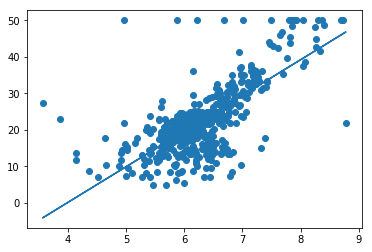

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(rm,y)
plt.plot(rm,rm*k+b)

# Part3  编辑距离Edit Distanc

In [434]:
solution = {}
distances = {}
best_substring = {}
# subString_record = set()

In [550]:

@lru_cache#(maxsize=2**10)
def edit_distance(string1, string2):
    
    if (len(string1) ==0) & (len(string2) != 0): 
        solution[(string1,string2)] = 'string1: {},  string2: {},  string1: ADD {},  next compare = nothing'.format(string1,string2,string2)
        distances[(string1,string2)] = len(string2)
        return len(string2)
    
    if (len(string2) == 0) & (len(string1) != 0): 
        solution[(string1,string2)] = 'string1: {},  string2: {},  string2: ADD {},  next compare = nothing'.format(string1,string2,string1)
        distances[(string1,string2)] = len(string1)
        return len(string1)
    
    if (len(string2) == 0) & (len(string1) == 0): 
        solution[(string1,string2)] = 'The End :)'
        distances[(string1,string2)] = 0
        return 0

    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'string1: {},  string2: {},  string1: DEL {},  next compare = ({},{})'.format(string1,string2,tail_s1,string1[:-1],string2),(string1[:-1], string2)),  # string 1 delete tail
        (edit_distance(string1, string2[:-1]) + 1, 'string1: {},  string2: {},  string1: ADD {},  next compare = ({},{})'.format(string1,string2,tail_s2,string1,string2[:-1]),(string1, string2[:-1])),  # string 1 add tail of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, 'string1: {},  string2: {},  Do nothing……,  next compare = ({},{})'.format(string1,string2,string1[:-1],string2[:-1]),(string1[:-1], string2[:-1]))
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'string1: {},  string2: {},  string1: SUB {} => {},  next compare = ({},{})'.format(string1,string2, tail_s1, tail_s2,string1[:-1],string2[:-1]),(string1[:-1], string2[:-1]))

    candidates.append(both_forward)
    
    min_distance, operation, next_substrings = min(candidates, key=lambda x: x[0])
    
    solution[(string1,string2)] = operation
    distances[(string1,string2)] = min_distance
    best_substring[(string1,string2)] = next_substrings
#     subString_record.add((string1,string2))
    return min_distance

In [551]:
from functools import wraps
def lru_cache(f):
#     lru_cache.computed = {}
    @wraps(f)
    def wrap(string1,string2):
        if (string1,string2) in distances:
            result = distances[(string1,string2)]
        else:
            result = f(string1,string2)
        return result
    return wrap

In [552]:
def parse_Edit(string1,string2):
    edit_distance(string1,string2)
    if min(len(string1),len(string2)) == 0:        
        return solution[(string1,string2)]
    else:
        a, b = best_substring[(string1,string2)][0], best_substring[(string1,string2)][1]
        return solution[(string1,string2)] + '\n' + parse_Edit(*best_substring[(string1,string2)])

In [553]:
solution = {}
distances = {}
best_substring = {}
edit_distance('af', 'f')

1

In [554]:
solution

{('', 'f'): 'string1: ,  string2: f,  string1: ADD f,  next compare = nothing',
 ('a', ''): 'string1: a,  string2: ,  string2: ADD a,  next compare = nothing',
 ('', ''): 'The End :)',
 ('a',
  'f'): 'string1: a,  string2: f,  string1: SUB a => f,  next compare = (,)',
 ('af',
  ''): 'string1: af,  string2: ,  string2: ADD af,  next compare = nothing',
 ('af', 'f'): 'string1: af,  string2: f,  Do nothing……,  next compare = (a,)'}

In [555]:
distances

{('', 'f'): 1,
 ('a', ''): 1,
 ('', ''): 0,
 ('a', 'f'): 1,
 ('af', ''): 2,
 ('af', 'f'): 1}

In [556]:
best_substring

{('a', 'f'): ('', ''), ('af', 'f'): ('a', '')}

In [558]:
solution = {}
distances = {}
best_substring = {}
print(parse_Edit('afasfhjghjkf','ffsafjfhjgjhklf'))

string1: afasfhjghjkf,  string2: ffsafjfhjgjhklf,  Do nothing……,  next compare = (afasfhjghjk,ffsafjfhjgjhkl)
string1: afasfhjghjk,  string2: ffsafjfhjgjhkl,  string1: ADD l,  next compare = (afasfhjghjk,ffsafjfhjgjhk)
string1: afasfhjghjk,  string2: ffsafjfhjgjhk,  Do nothing……,  next compare = (afasfhjghj,ffsafjfhjgjh)
string1: afasfhjghj,  string2: ffsafjfhjgjh,  string1: DEL j,  next compare = (afasfhjgh,ffsafjfhjgjh)
string1: afasfhjgh,  string2: ffsafjfhjgjh,  Do nothing……,  next compare = (afasfhjg,ffsafjfhjgj)
string1: afasfhjg,  string2: ffsafjfhjgj,  string1: ADD j,  next compare = (afasfhjg,ffsafjfhjg)
string1: afasfhjg,  string2: ffsafjfhjg,  Do nothing……,  next compare = (afasfhj,ffsafjfhj)
string1: afasfhj,  string2: ffsafjfhj,  Do nothing……,  next compare = (afasfh,ffsafjfh)
string1: afasfh,  string2: ffsafjfh,  Do nothing……,  next compare = (afasf,ffsafjf)
string1: afasf,  string2: ffsafjf,  Do nothing……,  next compare = (afas,ffsafj)
string1: afas,  string2: ffsafj,  s

## Part 5-1: review machine learning

1. Why do we use Derivative / Gradient to fit a target function？

Ans:因为我们定义的用来拟合现实数据的模型往往比较复杂，直接求极值点的解析解不现实

Because the model to fit data  from the real world is too complex, it is unrealistic to find the analytic solution of the extremum point directly.

2. In the words 'Gredient Descent', what's the Gredient and what's the Descent?¶

Ans:梯度是反映函数在某一点处变化快慢的变量，下降可以从两方面来看，当梯度大于0时，损失函数随着参数的增大而增大，因此，需要将参数调小才能使得损失函数变小；当梯度小于零时，损失函数随着参数的增大而减小，因此需要将参数调大才能使得损失函数变小。综上参数迭代的方向总是和梯度的方向是相反的
'Gradient' is a vairable to reflect how fast the function changes at a certain point.The 'Descent' can be analysed from two aspects. on on aspect,when the gradient is greater than 0, the value of the loss function will increase when the parameter is increasing, so we need to reduce the parameter to make the loss function become small.On the other aspect, when the gradient is less than 0 ,the value of the loss function will decrease when the parameter is decreasing, so we need to increase the parameter to make the loss function become small.In summary, the direction of the parameter iteration is always opposite to the direction of the gradient.

3. What's the advantages of the 3rd gradient descent method compared to the previous methods?

Ans:

4. Using the simple words to describe: What's the machine leanring.¶

Ans:是一种监督学习方式，能够使得预定义模型尽可能地拟合真实数据

（ a supervised method to make the predefined model adapt its paragrams to fit the real-world data as much as possible）

## Part 5-2: Answer following questions:

1.Why do we need dynamic programming? What's the difference of dynamic programming and previous talked search problme?

Ans:（？？）

因为有一些任务在处理的过程中会对其中的某些子任务进行重复处理，使用动态规划可以避免重复处理子任务。
之前的搜索问题是🈶确定的图结构，求某两个固定点之间的最小距离，动态规划是在求解的过程中存储一些子任务的结果以便后期直接查询使用

2.Why do we still need dynamic programming? Why not we train a machine learning to fit a function which could get the right answer based on inputs?

Ans:

动态规划相对于机器学习能获得更精确的结果，机器学习是基于经验的，不断迭代模型参数以拟合已有的数据，但是得到的并不是精确数据

3.Can you catch up at least 3 problems which could solved by Dynamic Programming?

Ans:

+ 深度优先搜索
+ 广度优先搜索
+ 管道切割问题，

4.Can you catch up at least 3 problems wich could sloved by Edit Distance?

Ans:
+ 文本相似度计算
+ 输入检测
+ 基因编辑

5.Please summarize the three main features of Dynamic Programming, and make a concise explain for each feature.

Ans:

+ 要用到递归：动态规划问题中，一个任务的完成往往要建立在子任务基础之上，子任务又要依赖其自身的子任务，因此常常要用到递归的方式解决动态规划问题

+ 会产生一张临时的‘表’来记录子任务处理结果：动态规划问题在解决的过程中会将子任务的计算结果以键值对的形式临时保存下来以供其他子任务查询

+ 避免重复计算：正式因为动态规划问题会产生一个临时的表，记录下子任务的处理结果，因此在递归处理的过程中无需做许多次重复计算，只需要查表直接获取子任务的结果就可以了



6.What's the disadvantages of Dynamic Programming? (You may need search by yourself in Internet)

Ans:
+ 没有统一的标准模型；
+ 数值方法求解时存在维数灾。